In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [4]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [5]:
# Count df.isnull().sum()

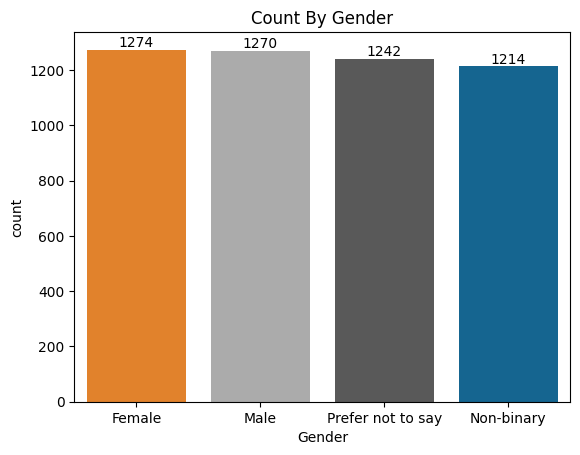

In [6]:
# Count Gender distribution and sort them larget to smallest
counts = df["Gender"].value_counts()
sort = counts.index
ax = sns.countplot(x = df['Gender'],order=sort,hue=df['Gender'], data=df)
plt.title("Count By Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

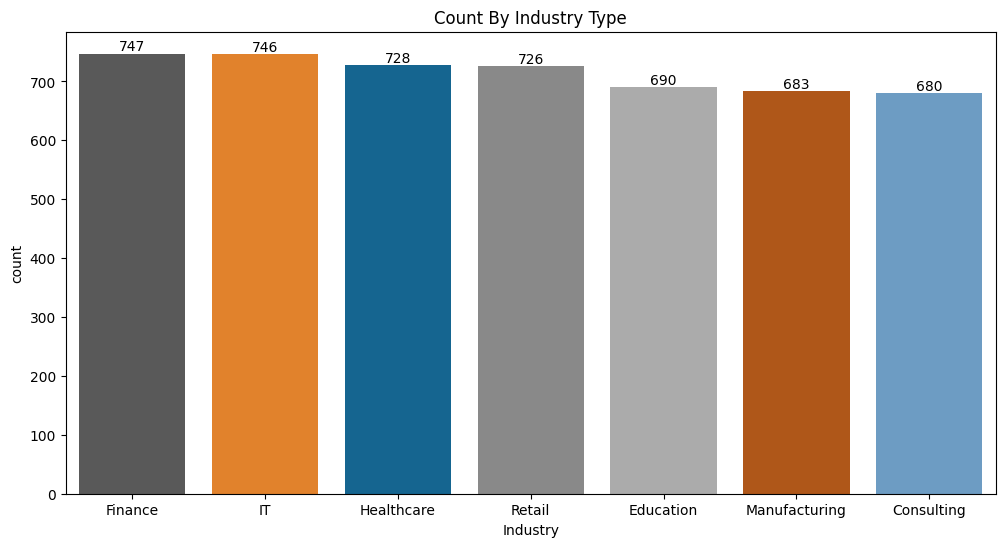

In [7]:
# Count Gender distribution and sort them larget to smallest
counts_industry = df["Industry"].value_counts()
sort = counts_industry.index
plt.figure(figsize=(12,6))
ax = sns.countplot(x = df['Industry'],order=sort,hue=df['Industry'], data=df)
plt.title("Count By Industry Type")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

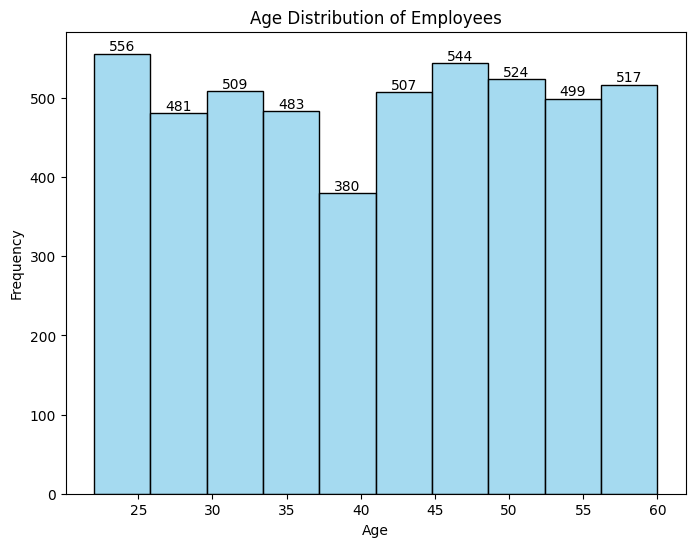

In [8]:

# Histogram for Age distribution
plt.figure(figsize=(8,6))  
ax = sns.histplot(df['Age'], bins=10, kde=False, color="skyblue")  # kde=False means no KDE line
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height),  # Coordinates for label
                ha='center', va='bottom')  # Aligning label
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


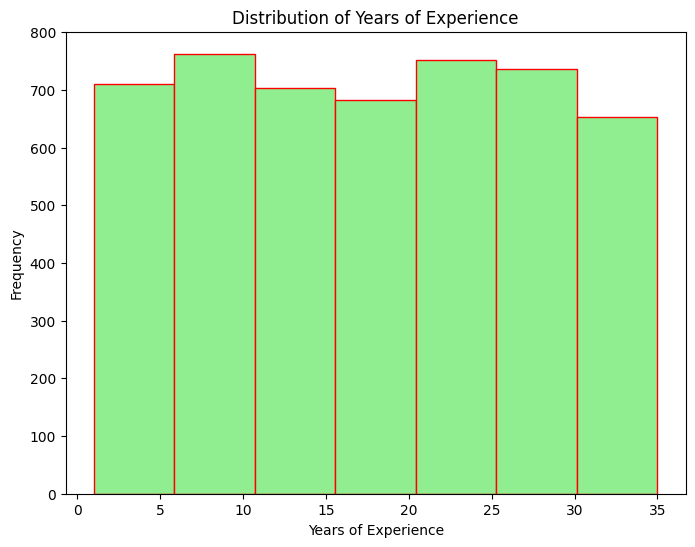

In [9]:
# Plotting the distribution of Years of Experience
plt.figure(figsize=(8,6))  # Adjusting figure size if needed
plt.hist(df['Years_of_Experience'], bins=7, color='lightgreen', edgecolor='red')

# Adding title and labels
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

# Display the plot
plt.show()


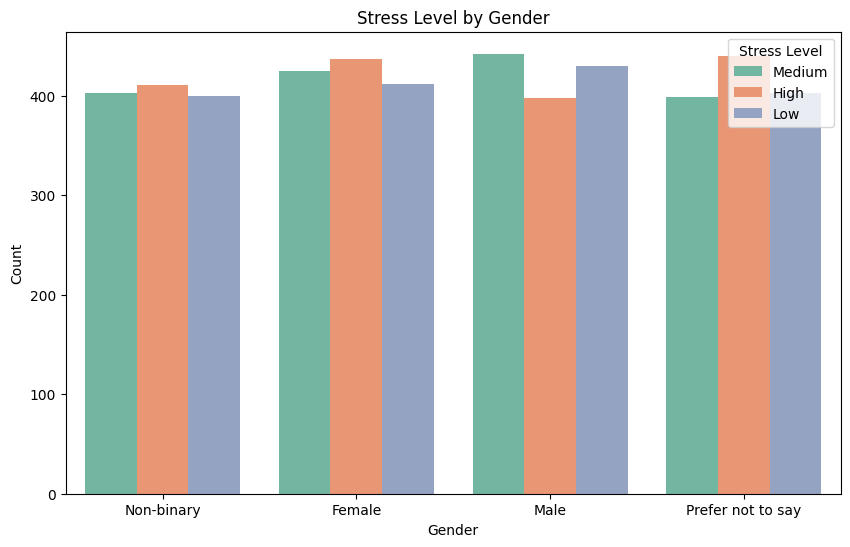

In [10]:
# Stress Level By Gender

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Stress_Level', data=df, palette='Set2')
plt.title("Stress Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Stress Level')
plt.show()


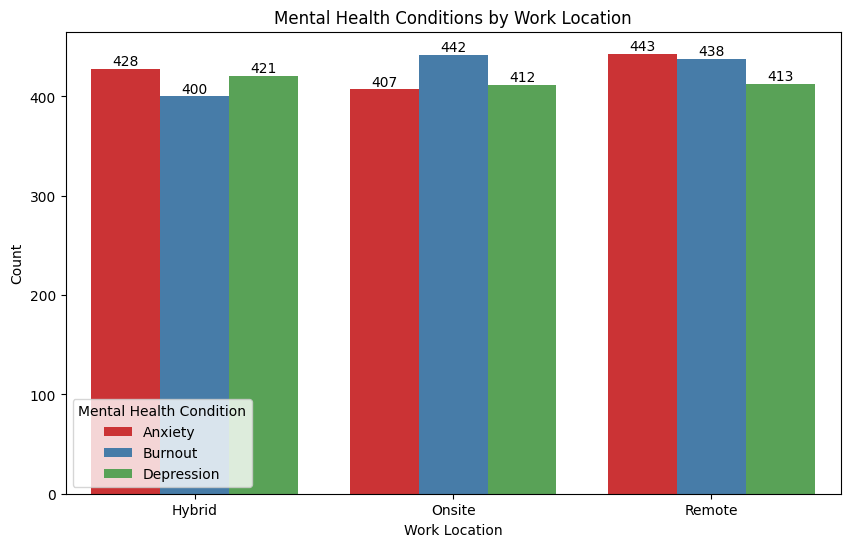

In [11]:
# Calculate the counts of mental health conditions for remote and onsite workers
mental_health_summary = df.groupby(['Work_Location', 'Mental_Health_Condition']).size().unstack(fill_value=0)


mental_health_summary = mental_health_summary.reset_index()

# Melt the DataFrame for better visualization with Seaborn
mental_health_melted = mental_health_summary.melt(id_vars='Work_Location', var_name='Mental_Health_Condition', value_name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Work_Location', y='Count', hue='Mental_Health_Condition', data=mental_health_melted, palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Mental Health Conditions by Work Location")
plt.xlabel("Work Location")
plt.ylabel("Count")
plt.legend(title='Mental Health Condition')
plt.show()


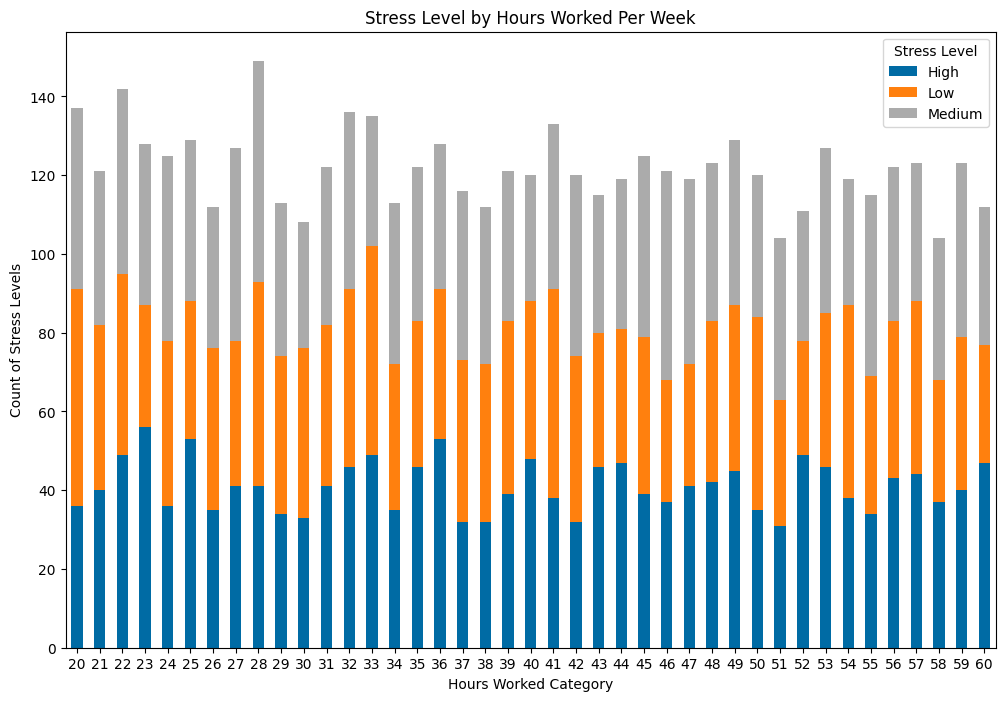

In [12]:
# Count the number of stress levels for each category of working hours
stress_by_hours = df.groupby('Hours_Worked_Per_Week')['Stress_Level'].value_counts().unstack(fill_value=0)



stress_by_hours.plot(kind='bar', stacked=True,figsize=(12,8))
plt.title('Stress Level by Hours Worked Per Week')
plt.xlabel('Hours Worked Category')
plt.ylabel('Count of Stress Levels')
plt.xticks(rotation=0)
plt.legend(title='Stress Level')
plt.show()


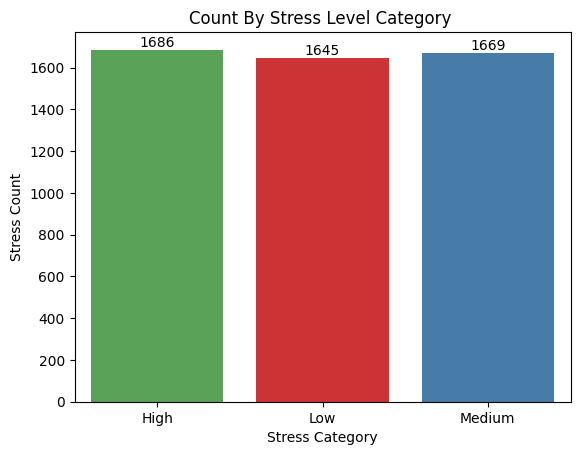

In [13]:
# Count the number of employees in each stress level category
stress_counts = df.groupby('Stress_Level').size()

ax = sns.barplot(x =stress_counts.index, y = stress_counts,hue=stress_counts,palette="Set1",legend=False )
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count By Stress Level Category ")
plt.xlabel("Stress Category")
plt.ylabel("Stress Count")
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_13356\2891406744.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_age_group = df.groupby(['Age_Group', 'Stress_Level']).size().unstack(fill_value=0)


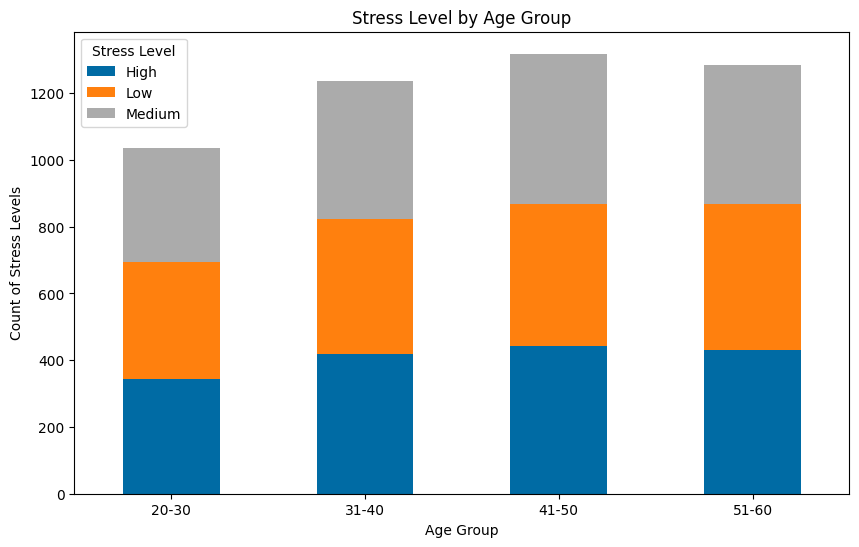

In [14]:
# Stress Level by Age


# Step 1: Define age bins and labels for groups (20-30, 31-40, etc.)
bins = [20, 30, 40, 50, 60]  # Define bin edges
labels = ['20-30', '31-40', '41-50', '51-60']  # Define labels for bins

# Step 2: Create a new column for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 3: Group by Age Group and Stress Level
stress_by_age_group = df.groupby(['Age_Group', 'Stress_Level']).size().unstack(fill_value=0)



# Step 4: Visualization - Stacked Bar Chart
stress_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stress Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')
plt.xticks(rotation=0)
plt.show()


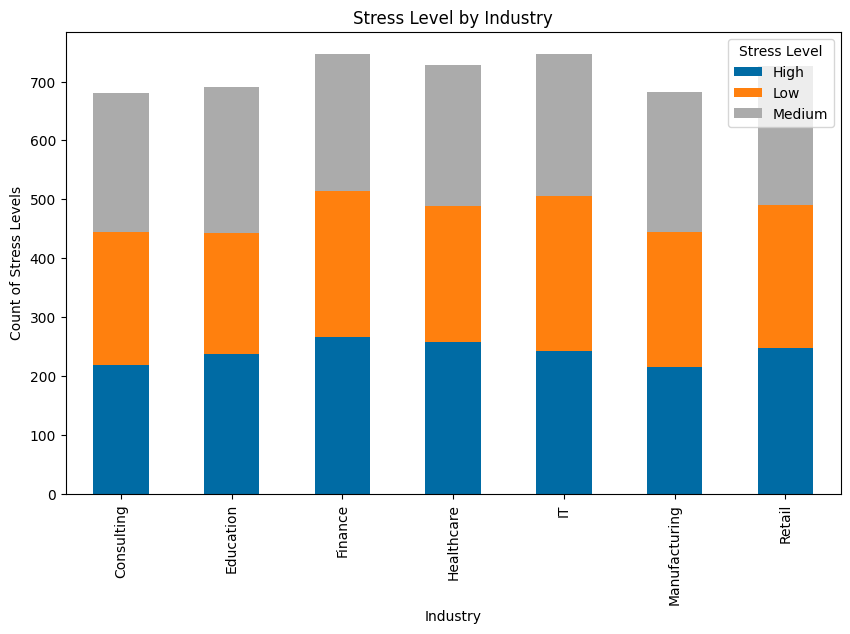

In [15]:

stress_by_age = df.groupby(['Industry', 'Stress_Level']).size().unstack(fill_value=0)


# Plotting the stacked bar chart
stress_by_age.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stress Level by Industry')
plt.xlabel('Industry')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')
plt.show()


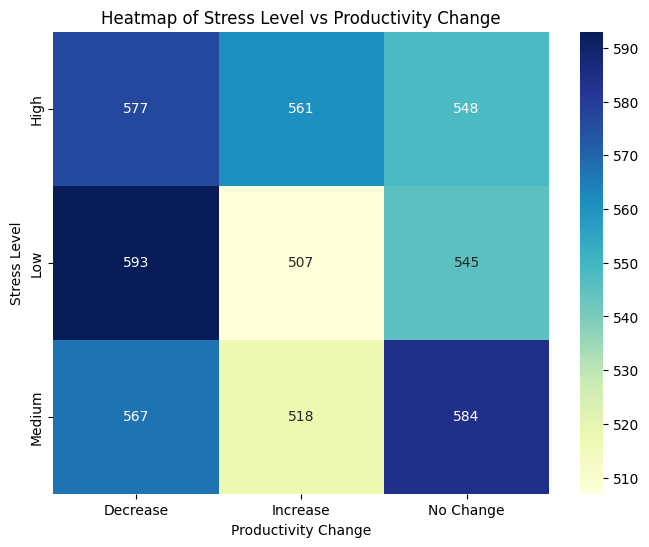

In [16]:

# Step 1: Create a cross-tabulation between Stress Level and Productivity Change
stress_vs_productivity = pd.crosstab(df['Stress_Level'], df['Productivity_Change'])


plt.figure(figsize=(8,6))
sns.heatmap(stress_vs_productivity, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Stress Level vs Productivity Change')
plt.xlabel('Productivity Change')
plt.ylabel('Stress Level')
plt.show()


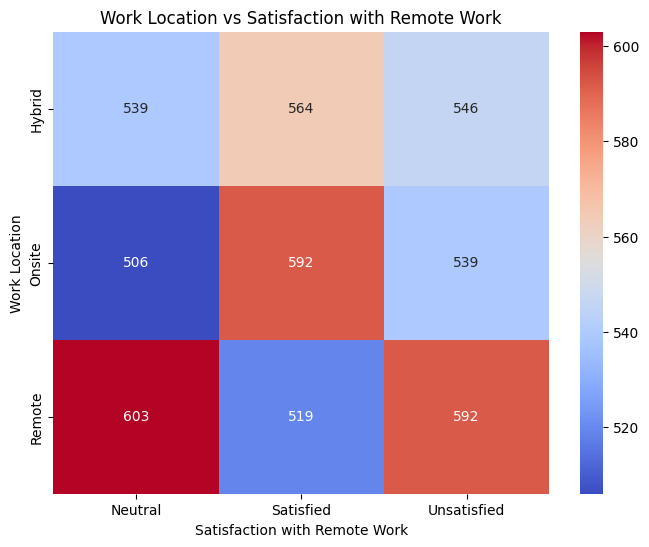

In [17]:


# Step 1: Create a cross-tabulation between Work Location and Satisfaction with Remote Work
location_vs_satisfaction = pd.crosstab(df['Work_Location'], df['Satisfaction_with_Remote_Work'])


# Step 3: Heatmap for better visualization (optional)
plt.figure(figsize=(8,6))
sns.heatmap(location_vs_satisfaction, annot=True, cmap="coolwarm", fmt="d")
plt.title('Work Location vs Satisfaction with Remote Work')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Work Location')
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_13356\220799233.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Satisfaction_with_Remote_Work', data=df, order=['Satisfied', 'Unsatisfied'], palette='Set2')


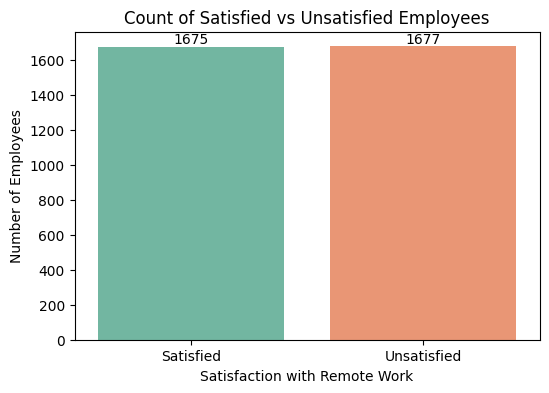

In [22]:
# Count occurrences of each satisfaction level
satisfaction_count = df['Satisfaction_with_Remote_Work'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Satisfaction_with_Remote_Work', data=df, order=['Satisfied', 'Unsatisfied'], palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Satisfied vs Unsatisfied Employees')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Number of Employees')
plt.show()



Productivity_Change  Decrease  Increase  No Change
Sleep_Quality                                     
Average                   565       522        541
Good                      560       516        611
Poor                      612       548        525


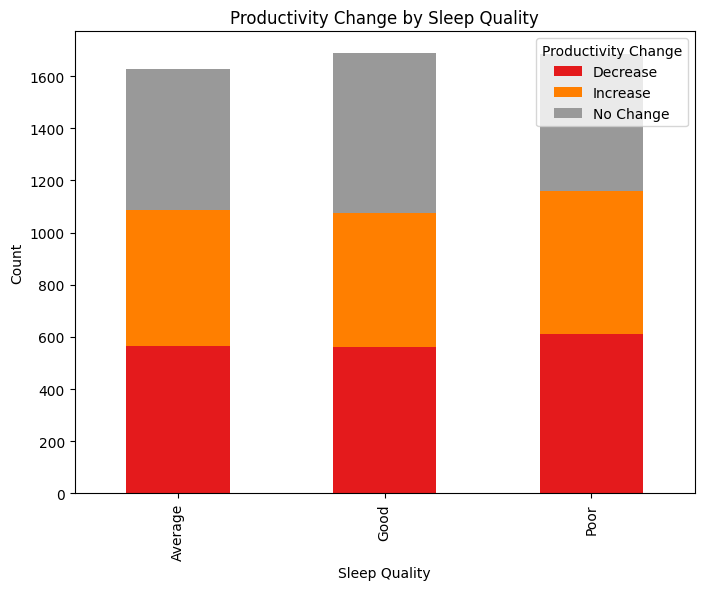

In [24]:
# Sleep Quality and Productivity Change.
# Contingency table of Sleep Quality and Productivity Change
contingency_table = pd.crosstab(df['Sleep_Quality'], df['Productivity_Change'])
print(contingency_table)
# Stacked bar plot for Sleep Quality and Productivity Change
contingency_table.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set1')
plt.title('Productivity Change by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()


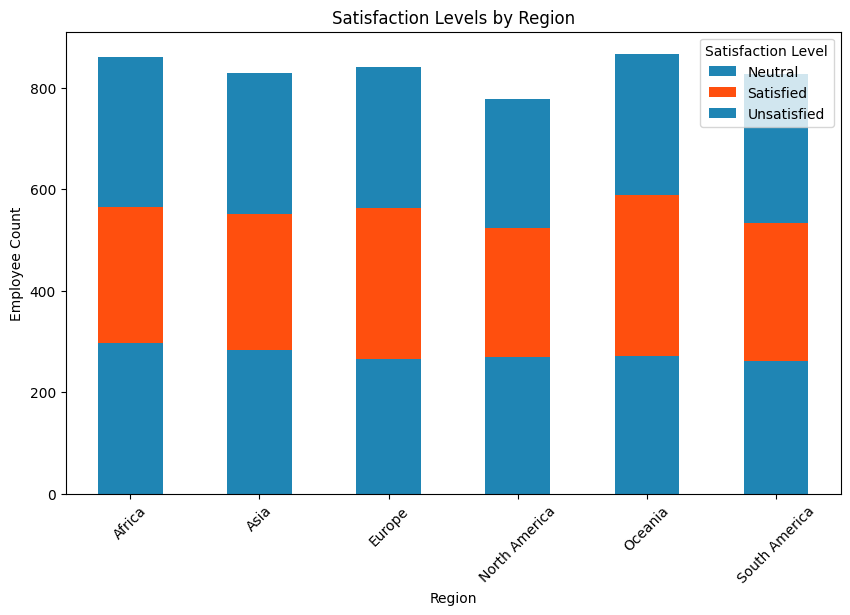

In [31]:
# Group by Region and Satisfaction level
satisfaction_by_region = df.groupby(['Region', 'Satisfaction_with_Remote_Work'])['Employee_ID'].count().reset_index()

# Rename columns for clarity
satisfaction_by_region.columns = ['Region', 'Satisfaction_Level', 'Employee_Count']

# Create a pivot table for the stacked bar plot
satisfaction_pivot = satisfaction_by_region.pivot(index='Region', columns='Satisfaction_Level', values='Employee_Count')

# Plot the stacked bar chart
satisfaction_pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f85b4', '#ff4f0e'])  # You can customize the colors here

plt.title('Satisfaction Levels by Region')
plt.xlabel('Region')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.show()



C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_13356\1377478611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Increase_Count', y='Industry', data=industry_productivity_increase, palette='Set1')


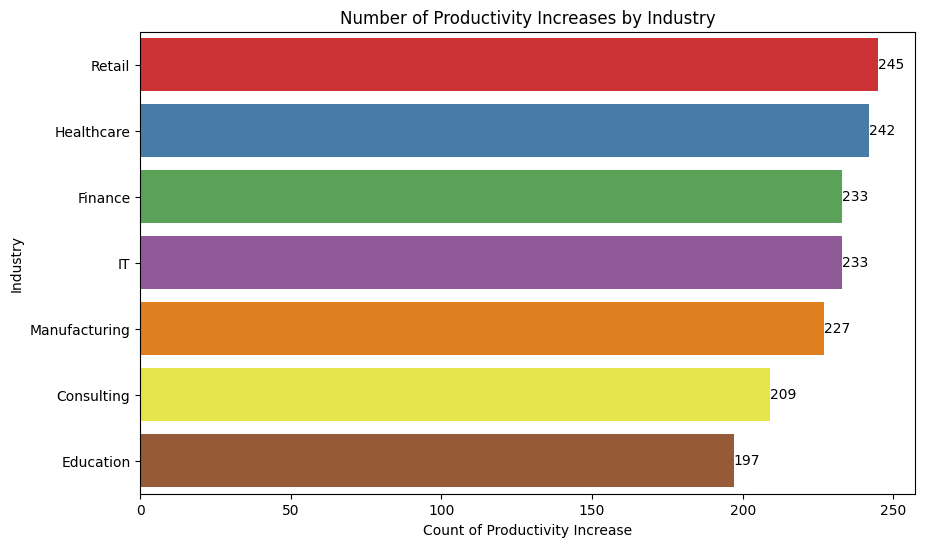

In [35]:
# Filter the data for 'Increase' in productivity
productivity_increase = df[df['Productivity_Change'] == 'Increase']

# Group by Industry and count the number of 'Increase' reports
industry_productivity_increase = productivity_increase.groupby('Industry')['Employee_ID'].count().reset_index()

# Rename columns for clarity
industry_productivity_increase.columns = ['Industry', 'Increase_Count']

# Sort the industries by the number of increases
industry_productivity_increase = industry_productivity_increase.sort_values(by='Increase_Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Increase_Count', y='Industry', data=industry_productivity_increase, palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Productivity Increases by Industry')
plt.xlabel('Count of Productivity Increase')
plt.ylabel('Industry')
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_13356\737545442.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Increase_Count', y='Job_Role', data=role_productivity_increase, palette='magma')


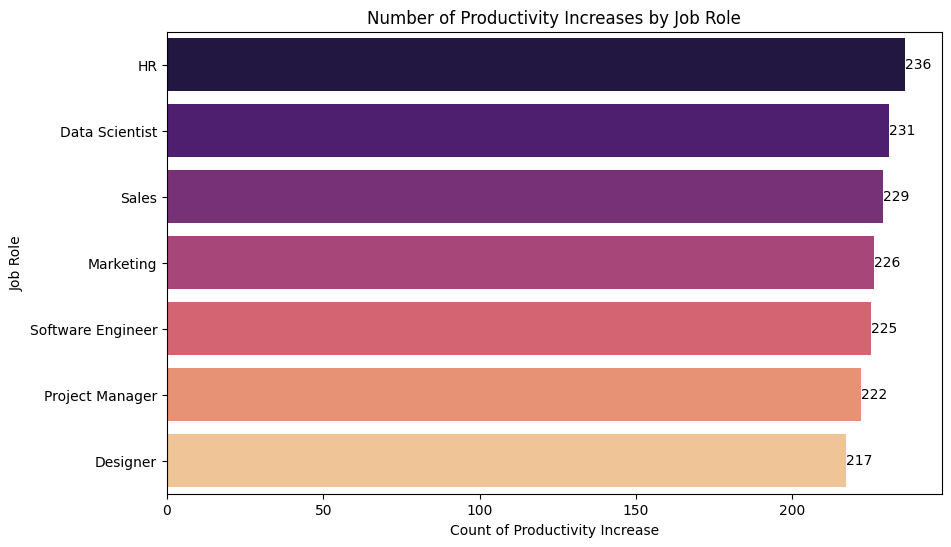

In [38]:
# Filter the data for 'Increase' in productivity
productivity_increase_by_role = df[df['Productivity_Change'] == 'Increase']

# Group by Job Role and count the number of 'Increase' reports
role_productivity_increase = productivity_increase_by_role.groupby('Job_Role')['Employee_ID'].count().reset_index()

# Rename columns for clarity
role_productivity_increase.columns = ['Job_Role', 'Increase_Count']

# Sort the roles by the number of increases
role_productivity_increase = role_productivity_increase.sort_values(by='Increase_Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Increase_Count', y='Job_Role', data=role_productivity_increase, palette='magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Productivity Increases by Job Role')
plt.xlabel('Count of Productivity Increase')
plt.ylabel('Job Role')
plt.show()
